In [ ]:
#import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn

In [ ]:
plt.rcParams['figure.figsize']=(16,5)
plt.style.use('fivethirtyeight')

In [ ]:
#import data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
print("size of train data: ",train.shape)
print('size of test data: ',test.shape)

size of train data:  (54808, 14)
size of test data:  (23490, 13)


In [ ]:
print('Column of the train data: ',train.columns)

print('\nColumn of the test data: ',test.columns)

Column of the train data:  Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

Column of the test data:  Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')


In [ ]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [ ]:
train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [ ]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [ ]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
train.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Number Of emp promoted

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


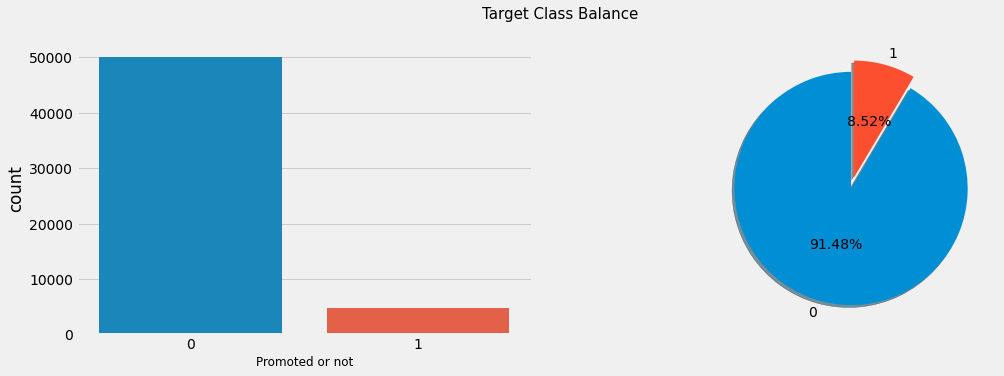

In [ ]:
plt.rcParams['figure.figsize']=(16,5)
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(train['is_promoted'])
plt.xlabel('Promoted or not',fontsize=12)


plt.subplot(1,2,2)
train['is_promoted'].value_counts().plot(kind='pie',explode=[0,0.1],autopct='%.2f%%',startangle=90,
                                        labels=['0','1'],shadow=True,pctdistance=0.5)

plt.axis('off')
plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

Null or missing value Check

In [ ]:
total_train=train.isnull().sum()
train_percent=((train.isnull().sum()/train.shape[0])*100).round(2)

total_test=test.isnull().sum()
test_percent=((test.isnull().sum()/test.shape[0])*100).round(2)

train_missing_data=pd.concat([total_train,train_percent,total_test,test_percent],
                            axis=1,
                            keys=['total_train','train_percent','total_test','test_percent'],
                            sort=True)

train_missing_data.style.bar(color='None')

,total_train,train_percent,total_test,test_percent
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


In [ ]:
train['education']=train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

train.isnull().sum().sum()

0

In [ ]:
test['education']=test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating']=test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])
test.isnull().sum().sum()

0

In [ ]:
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


Lets Check the Outlier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


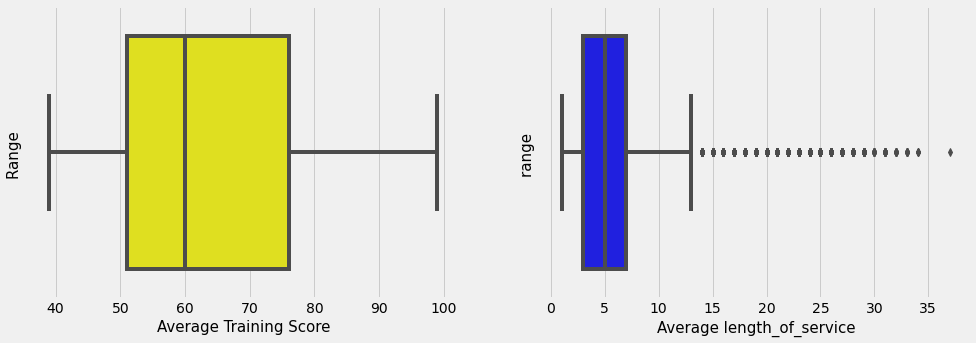

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.boxplot(train['avg_training_score'],color='yellow')
plt.xlabel('Average Training Score',fontsize=15)
plt.ylabel("Range ",fontsize=15)


plt.subplot(1,2,2)
sns.boxplot(train['length_of_service'],color='Blue')
plt.xlabel('Average length_of_service',fontsize=15)
plt.ylabel("range ",fontsize=15)

plt.show()

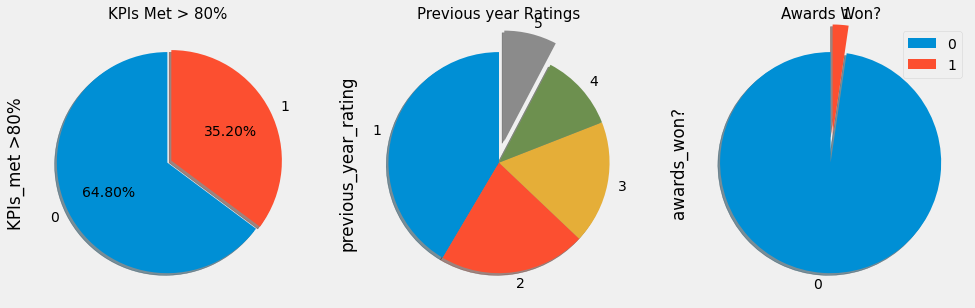

In [ ]:
plt.rcParams["figure.figsize"]=(15,5)
plt.style.use('fivethirtyeight')

plt.subplot(1,3,1)
train['KPIs_met >80%'].value_counts().plot(kind='pie',explode=[0,0.04],autopct='%.2f%%',startangle=90,
                                          labels=['0','1'],shadow=True)
plt.title('KPIs Met > 80%', fontsize = 15)

plt.subplot(1,3,2)
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
train['previous_year_rating'].value_counts().plot(kind='pie',explode=[0,0,0,0,0.2],startangle=90,
                                              labels=['1','2','3','4','5'],shadow=True,pctdistance=0.5)
plt.title('Previous year Ratings', fontsize = 15)

plt.subplot(1,3,3)
train['awards_won?'].value_counts().plot(kind='pie',explode=[0,0.25],startangle=90,
                                      labels=['0','1'],shadow=True,pctdistance=0.5)
plt.title('Awards Won?', fontsize = 15)

plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


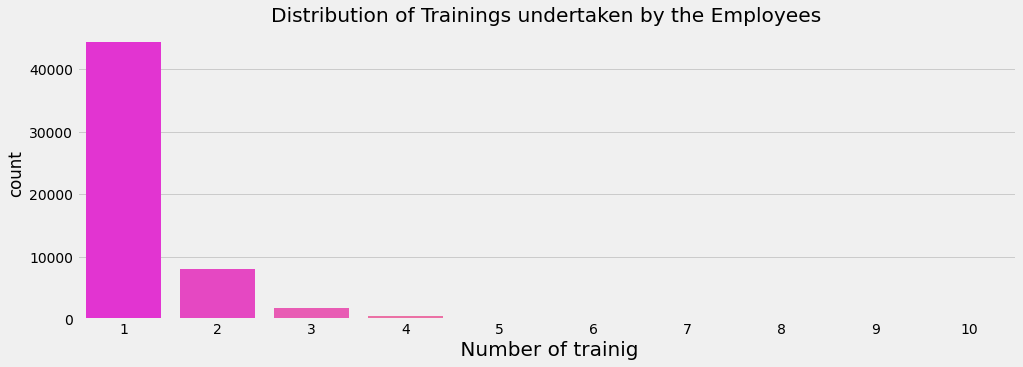

In [ ]:
plt.rcParams['figure.figsize']==(20,8)
plt.style.use('fivethirtyeight')
sns.countplot(train['no_of_trainings'],palette='spring')
plt.xlabel(' Number of trainig', fontsize=20)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

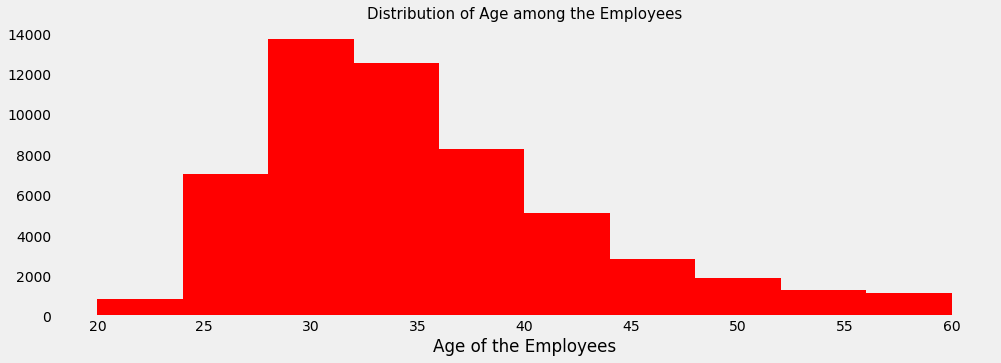

In [ ]:
plt.rcParams['figure.figsize']==(20,8)
plt.style.use('fivethirtyeight')
plt.hist(train['age'],color='red')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

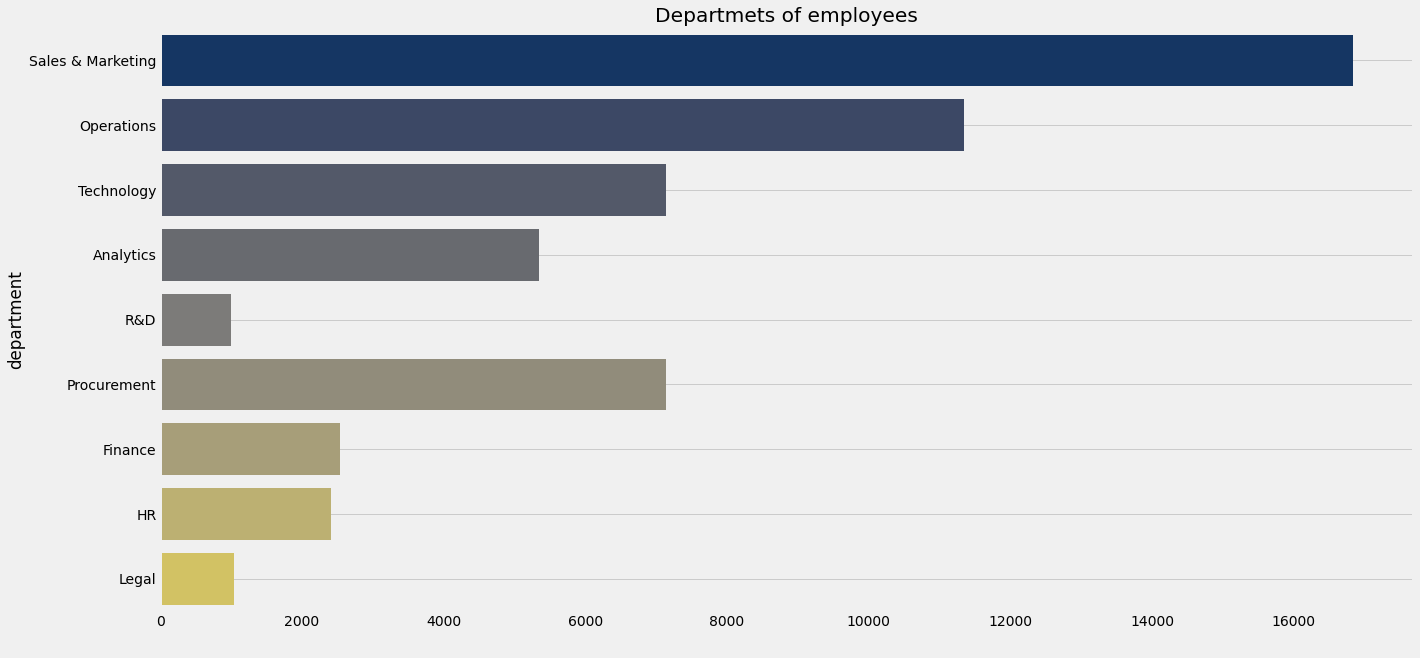

In [ ]:
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('fivethirtyeight')
sns.countplot(y=train['department'],palette='cividis',orient='v')
plt.title('Departmets of employees')
plt.xlabel(' ')
plt.ylabel('department')
plt.grid()
plt.show()

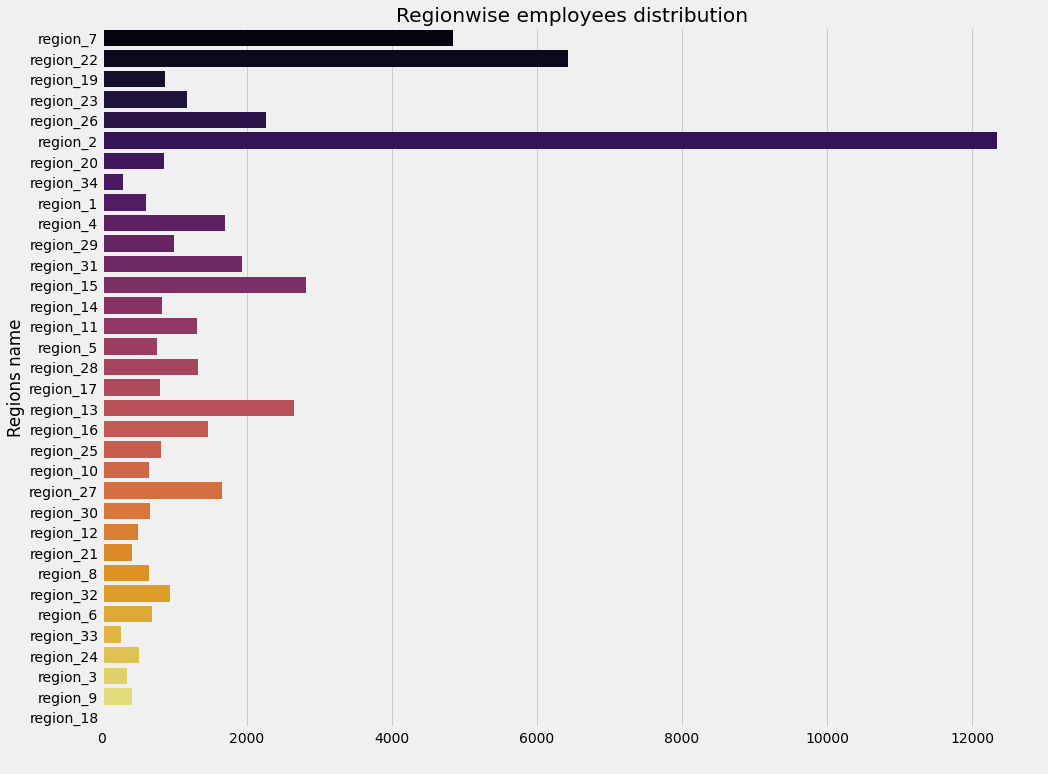

In [ ]:
plt.rcParams['figure.figsize']=(15,12)
sns.countplot(y=train['region'],palette='inferno',orient='v')
plt.title('Regionwise employees distribution')
plt.xlabel(' ')
plt.ylabel('Regions name')
plt.show()

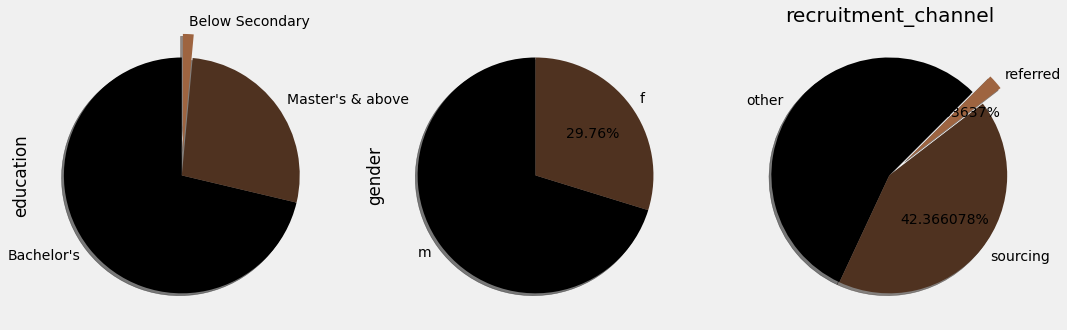

In [ ]:
plt.rcParams['figure.figsize']=(16,8)

plt.subplot(1,3,1)
colors = plt.cm.copper(np.linspace(0, 1, 5))

train['education'].value_counts().plot(kind='pie',labels=train['education'].value_counts().index, colors=colors,
                                      explode=[0,0,0.2],shadow = True, startangle = 90)

plt.subplot(1,3,2)
train['gender'].value_counts().plot(kind='pie',labels=train['gender'].value_counts().index,colors=colors,
                                   explode=[0,0],shadow=True,autopct="%.2f%%",startangle=90)

plt.subplot(1,3,3)
kind=train['recruitment_channel'].value_counts()
labels=train['recruitment_channel'].value_counts().index
plt.pie(kind,labels=labels,colors=colors,explode=[0,0,0.2],autopct='%2f%%',shadow=True,startangle=45)
plt.title('recruitment_channel')
plt.show()

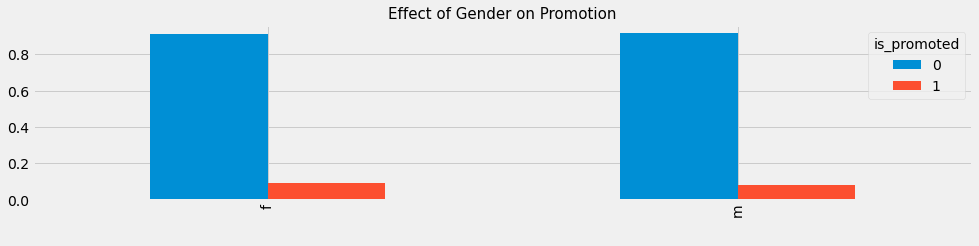

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(15,3)

x=pd.crosstab(train['gender'],train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float),axis=0).plot(kind= 'bar',stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(" ")
plt.show()

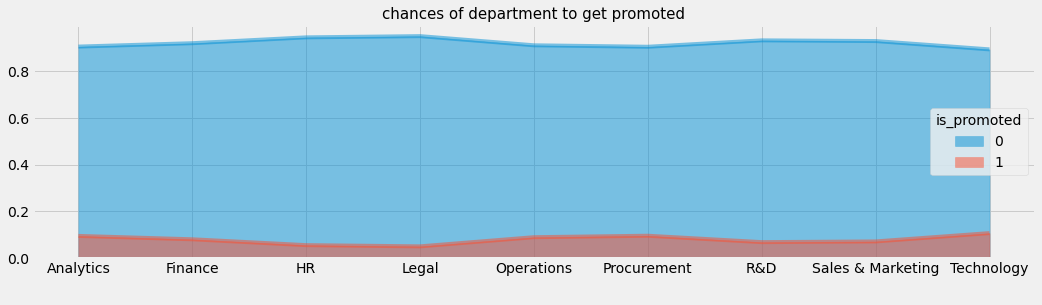

In [ ]:
plt.rcParams['figure.figsize']=(16,4)
x=pd.crosstab(train['department'],train['is_promoted'])
x.div(x.sum(1).astype(float),axis=0).plot(kind='area',stacked=False)
plt.title("chances of department to get promoted", fontsize=15)
plt.xlabel(' ')
plt.show()

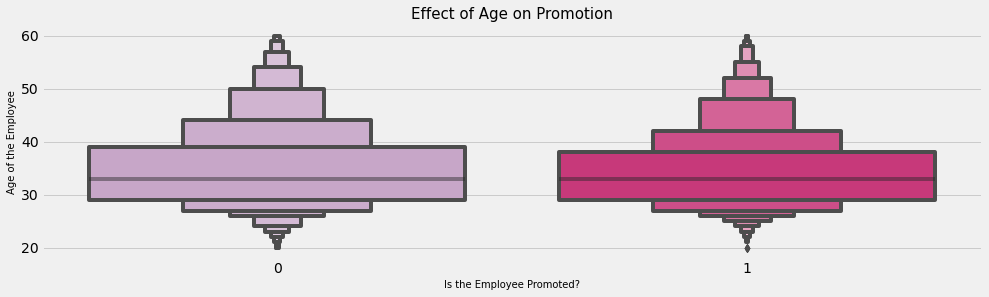

In [ ]:
plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

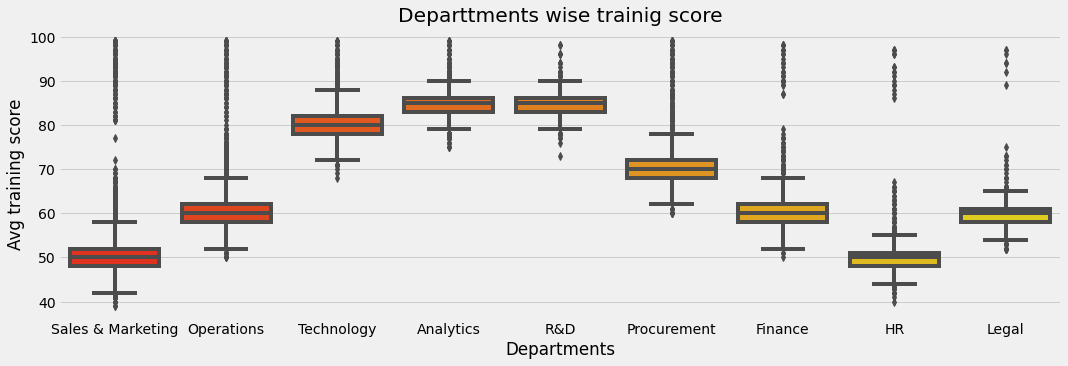

In [ ]:
plt.rcParams['figure.figsize']=(16,5)
sns.boxplot(train['department'],train['avg_training_score'],palette='autumn')
plt.title('Departtments wise trainig score')
plt.xlabel('Departments')
plt.ylabel('Avg training score')
plt.show()

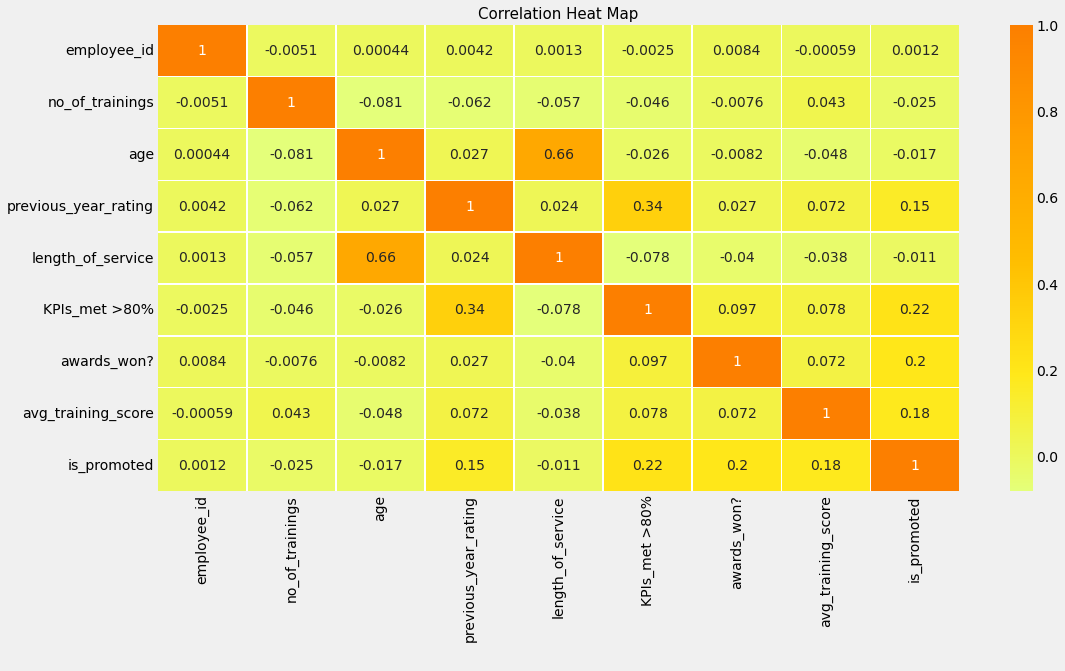

In [ ]:
plt.rcParams['figure.figsize']=(16,8)
sns.heatmap(train.corr(),annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.xlabel(' ')
plt.show()

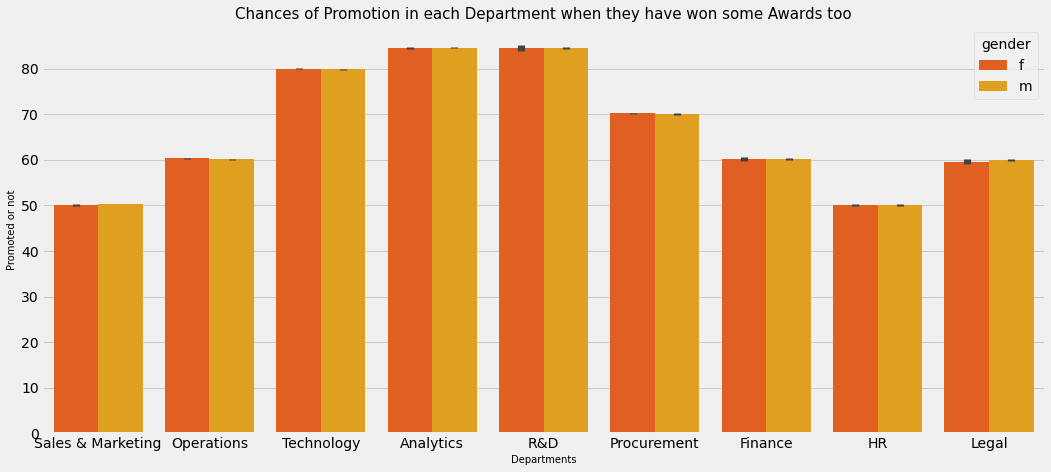

In [ ]:
plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(train['department'], train['avg_training_score'], hue = train['gender'], palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

In [ ]:
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [ ]:
train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')

In [ ]:
train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1,1.0,58
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1,1.0,58


In [ ]:
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (54808, 13)
After Deletion of the above two rows : (54806, 13)


In [ ]:
train.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [ ]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1,0,49,0,6.0,49
1,Operations,Bachelor's,m,1,30,5.0,4,0,0,60,0,5.0,60
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,0,50,0,3.0,50
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,0,50,0,1.0,100
4,Technology,Bachelor's,m,1,45,3.0,2,0,0,73,0,3.0,73


In [ ]:
train['education']=train['education'].replace(("Master's & above","Bachelor's","Below Secondary"),
                                              (3,2,1))
test['education']=test['education'].replace(("Master's & above","Bachelor's","Below Secondary"),
                                              (3,2,1))


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train['department']=le.fit_transform(train['department'])
test['department']=le.fit_transform(test['department'])

train['gender']=le.fit_transform(train['gender'])
test['gender']=le.fit_transform(test['gender'])

train.head()


,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


In [ ]:
y=train['is_promoted']
x=train.drop(['is_promoted'],axis=1)
x_test=test

In [ ]:
print('shape  of x: ',x.shape)
print('shape  of y: ',y.shape)
print('shape  of x_test: ',test.shape)

shape  of x:  (54806, 12)
shape  of y:  (54806,)
shape  of x_test:  (23490, 12)


In [ ]:
from imblearn.over_sampling import SMOTE
x_resample,y_resample=SMOTE().fit_resample(x,y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(100280, 12)
(100280,)


In [ ]:
print('Before resampling: ')
print(y.value_counts())


print("after resampling")
y_resample=pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before resampling: 
0    50140
1     4666
Name: is_promoted, dtype: int64
after resampling
0    50140
1    50140
Name: 0, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid=train_test_split(x_resample, y_resample,test_size=0.2,random_state=0)

print('shape of X train: ',x_train.shape)
print('shape of y train: ',y_train.shape)
print('shape of X valid: ',x_valid.shape)
print('shape of y valid: ',y_valid.shape)
print('shape of X test: ',x_test.shape)

shape of X train:  (80224, 12)
shape of y train:  (80224, 1)
shape of X valid:  (20056, 12)
shape of y valid:  (20056, 1)
shape of X test:  (23490, 12)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred=model.predict(x_valid)

In [ ]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

Training Accuracy : 0.9904143398484244
Testing Accuracy : 0.9343338651775029


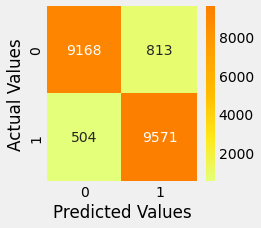

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(y_valid,y_pred)

plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


In [ ]:
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      9981
           1       0.92      0.95      0.94     10075

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056

